## Problem 1 exercise 4

In [1]:
import matplotlib.pyplot as plt
import math
import numpy as np
import copy
import random

In [3]:
#the parameter vector of the true model and the observations
ttr=np.double([0 for x in range(5)])
t0=0.2
t1=-1
t2=0.9
t3=0.7
t5=-0.2
ttr=np.array([t0,t1,t2,t3, t5])



N=20

#create the training set and the true values of y
def initialize(N,t,s):
    x=np.zeros(N)
    xtrue=np.zeros(N)
    y=np.zeros(N)
    ytrue=np.zeros(N)
    
    #random points of x in [0,2]
    
    for i in range(N):
        x[i]=random.uniform(0,2.0)

    #equidistant points of x
    
    for i in range(N):
        xtrue[i]=i/(N/2)

    #create the observations and the true value of y
    
    for i in range(N):
        noise=np.random.normal(0,s,1)
        #noise=0
        y[i]=ttr[0]+x[i]*ttr[1]+(x[i]**2)*ttr[2]+(x[i]**3)*ttr[3]+(x[i]**5)*ttr[4]+noise
        ytrue[i]=ttr[0]+xtrue[i]*ttr[1]+(xtrue[i]**2)*ttr[2]+(xtrue[i]**3)*ttr[3]+(xtrue[i]**5)*ttr[4]
    
    return x,xtrue,ytrue,y

s=0.05
x,xtrue,ytrue,y=initialize(N,ttr,s)
    

In [4]:
sh=0.05
Sh=sh*np.identity(5)
print(Sh)
st=0.1
St=st*np.identity(5)

[[0.05 0.   0.   0.   0.  ]
 [0.   0.05 0.   0.   0.  ]
 [0.   0.   0.05 0.   0.  ]
 [0.   0.   0.   0.05 0.  ]
 [0.   0.   0.   0.   0.05]]


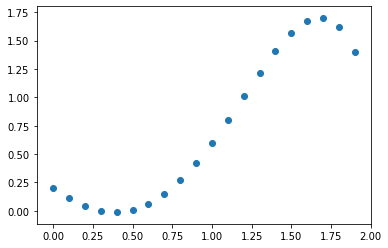

In [5]:
#plot the distribution without noise (true value of y)
plt.scatter(xtrue,ytrue)

In [6]:
#creation of the vandermonde matrix
def initializeM(N,x): 
    m1=np.double([[0 for x in range(5)]for y in range(N)])
    for i in range(N):
        for j in range(5):
            if(j!=4):
                m1[i,j]=x[i]**j
            else:
                m1[i,j]=x[i]**5
    m1t=m1.transpose()
    return m1,m1t


In [7]:
#bayesian inference

def BayesInf(sh,st,N,t,x,xtrue,ytrue,m1,m1t):
    mu=t+(1/sh)*np.matmul(np.linalg.inv((1/st)*np.identity(5)+(1/sh)*np.matmul(m1t,m1)),np.matmul(m1t,(y-np.matmul(m1,t))))
    #yp=np.matmul(mu,m1t)

    x=np.zeros(20)
    yp=np.zeros(20)
    
    #test set that has 20 random points
    
    for i in range(20):
        x[i]=random.uniform(0,2.0)
        yp[i]=mu[0]+x[i]*mu[1]+(x[i]**2)*mu[2]+(x[i]**3)*mu[3]+(x[i]**5)*mu[4]
    
    sy=np.zeros(20)
    
    #the error of y

    for i in range(20):
        sy[i]=sh+sh*st*np.matmul(np.matmul(m1[i],np.linalg.inv(sh*np.identity(5)+st*np.matmul(m1t,m1))),m1[i])

    
    #plot the results with the error bars of y
    
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.errorbar(x, yp, yerr=sy, fmt='o', ecolor='orangered',color='orange', capsize=2)
    plt.plot(xtrue,ytrue,color='black')
    
    #we change the tritle of the diagram depending the question of the exercise
    
    ax.set_title('Prediction of y with N='+str(N)+' and \u03C3 = '+str(st))




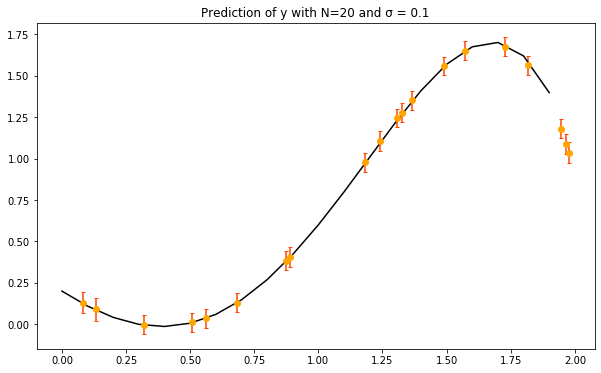

In [8]:
m1,m1t=initializeM(20,x)
BayesInf(0.05,st,N,ttr,x,xtrue,ytrue,m1,m1t)

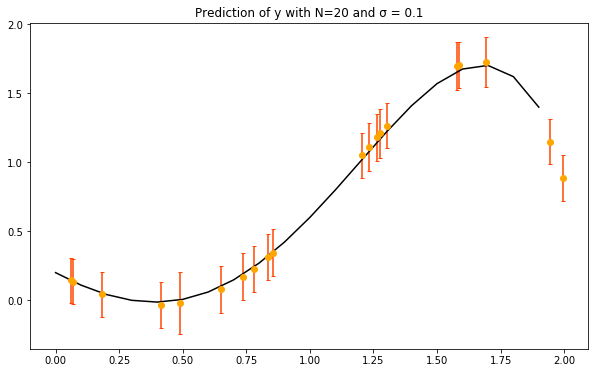

In [9]:
#for N=20 and sn=0.15
x,xtrue,ytrue,y=initialize(N,ttr,0.15)
m1,m1t=initializeM(20,x)
BayesInf(0.15,st,N,ttr,x,xtrue,ytrue,m1,m1t)

## Problem 1 exercise 5

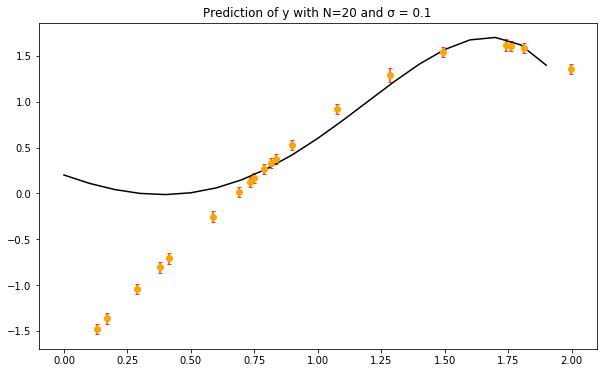

In [10]:
#new mean vector
t2=[-10.54,0.465,0.0087,-0.093,-0.004]

#for N=20 and covariance equal to 0.1
N=20
st=0.1
x,xtrue,ytrue,y=initialize(N,t2,0.05)
m1,m1t=initializeM(20,x)
BayesInf(0.05,st,N,t2,x,xtrue,ytrue,m1,m1t)

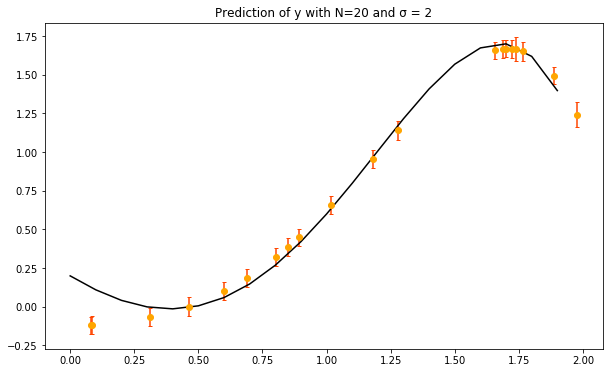

In [11]:
#for N=20 and covariance equal to 2
st=2
BayesInf(0.05,st,N,t2,x,xtrue,ytrue,m1,m1t)

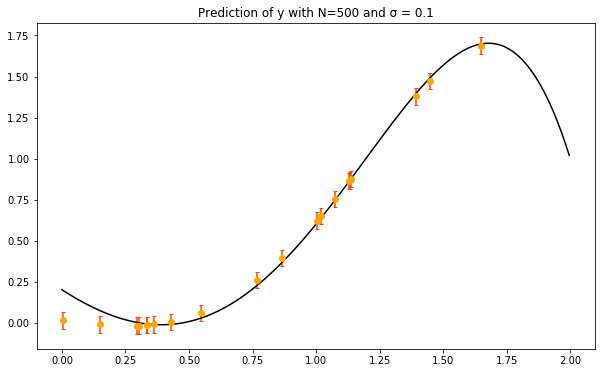

In [12]:
#for N=500 and covariance equal to 0.1
N=500
st=0.1
x,xtrue,ytrue,y=initialize(N,t2,0.05)
m1,m1t=initializeM(N,x)
BayesInf(0.05,st,N,t2,x,xtrue,ytrue,m1,m1t)

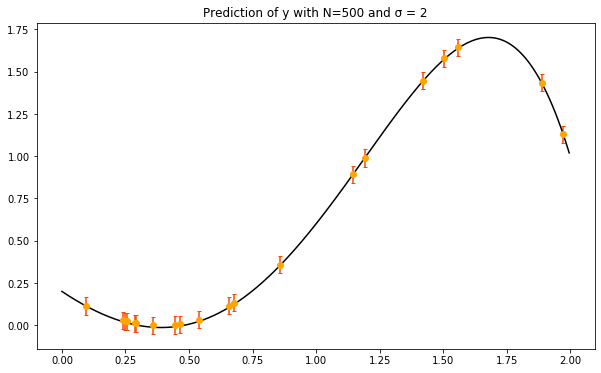

In [13]:
#for N=500 and covariance equal to 2
st=2
x,xtrue,ytrue,y=initialize(N,t2,0.05)
m1,m1t=initializeM(N,x)
BayesInf(0.05,st,N,t2,x,xtrue,ytrue,m1,m1t)

## Problem 1 exercise 6


In [14]:
N=500
sn=0.05
t0=0.2
t1=-1
t2=0.9
t3=0.7
t5=-0.2
t=np.array([t0,t1,t2,t3, t5])
x,xtrue,ytrue,y=initialize(N,t,sn)

In [15]:
a=1
b=1
m1,m1t=initializeM(N,x)
aold=0
bold=0
K=5

#run the EXPECTATION MAXIMIZATION ALGORITHM

while((abs(aold-a)>0.001) or (abs(bold-b)>0.001)):
    aold=a
    bold=b
    s=np.linalg.inv(a*np.identity(5)+np.matmul(b*m1t,m1))
    med=b*np.matmul(np.linalg.inv(a*np.identity(5)+np.matmul(b*m1t,m1)),np.matmul(m1t,y))
    medt=med.transpose()
    
    acap=np.matmul(medt,med)-np.trace(s)
    bcap=(np.linalg.norm(y-np.matmul(m1,med)))**2+np.trace(np.matmul(m1,np.matmul(s,m1t)))
    a=K/acap
    b=N/bcap
    
    
stp=1/a
snp=1/b

#After convergence we calculate the new x and y taking 20 random values of x [0,2]

xpr=np.zeros(20)

for i in range(20):
        xpr[i]=random.uniform(0,2.0)

m1p,m1tp=initializeM(20,xpr)

ypredict=np.matmul(med,m1tp)

#the errors of y

sypredict=np.zeros(20)

for i in range(20):
    sypredict[i]=sn+sn*stp*np.matmul(np.matmul(m1p[i],np.linalg.inv(sn*np.identity(5)+stp*np.matmul(m1tp,m1p))),m1p[i])




Text(0.5, 1.0, 'Expectation-Maximization Algorithm')

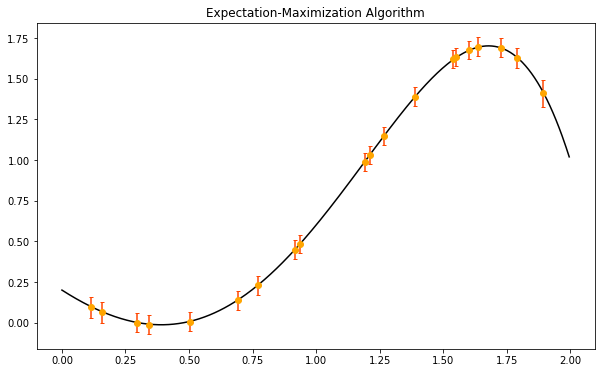

In [16]:
#plot the expectation-maximization prediction + the error bars of y
fig, ax = plt.subplots(figsize=(10, 6))
ax.errorbar(xpr, ypredict, yerr=sypredict, fmt='o', ecolor='orangered',color='orange', capsize=2)
plt.plot(xtrue,ytrue,color='black')
ax.set_title('Expectation-Maximization Algorithm')